In [1]:
def get_quandl_data(quandl_id):
    ''' Quandlの時系列データのキャッシュを取得'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

In [4]:
import os
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [7]:
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

Loaded BCHARTS/KRAKENUSD from cache


In [9]:
btc_usd_price_kraken.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [13]:
btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Weighted Price'])
py.iplot([btc_trace])

In [1]:
#重回帰
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/shogo/Downloads/ドイチェ'

In [140]:
total_price = pd.read_csv('時価総額.csv')
total_price.shape

(364, 2)

In [139]:
total_deal = pd.read_csv('総取引量.csv')
total_deal.shape

(364, 2)

In [144]:
total_amount = pd.read_csv('総発行量.csv')
total_amount.shape

(364, 2)

In [191]:
btc=pd.read_csv('BTC20170920-.csv')
btc.shape

(364, 1)

In [216]:
total_price=total_price.iloc[::-1]
total_deal=total_deal.iloc[::-1]
total_amount=total_amount.iloc[::-1]

In [270]:
btc=btc.iloc[::-1]

In [241]:
total=total.drop('price', axis=1)

In [223]:
total_price.head()

,time,price
363,2018/9/20 0:00,1.109060e+11
362,2018/9/19 0:00,1.094640e+11
361,2018/9/18 0:00,1.087750e+11
360,2018/9/17 0:00,1.105600e+11
359,2018/9/16 0:00,1.119310e+11


In [224]:
total_deal.head()

,time,deal
363,2018/9/20 0:00,425834153.3
362,2018/9/19 0:00,321494577.2
361,2018/9/18 0:00,346869668.3
360,2018/9/17 0:00,217488658.8
359,2018/9/16 0:00,181083665.0


In [225]:
total_amount.head()

,time,amount
363,2018/9/20 0:00,17278975.0
362,2018/9/19 0:00,17277050.0
361,2018/9/18 0:00,17275100.0
360,2018/9/17 0:00,17273325.0
359,2018/9/16 0:00,17271637.5


In [226]:
btc.head()

,btc
363,394294
362,416338
361,414530
360,433470
359,434942


In [227]:
total=pd.merge(total_price, total_amount)
total=pd.merge(total, total_deal)

In [262]:
X = total.loc[:, ['amount', 'deal']].values

In [244]:
y = total.loc[:, ['btc']].values

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [246]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [247]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [265]:
lr.intercept_

array([2221637.55527318])

In [271]:
lr.coef_

array([[-0.09067338,  0.00032472]])

In [240]:
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** (1/2)))

RMSE
train: 46242.749
test : 43429.261


In [267]:
15736900+700000*4+350000*3

19586900

In [274]:
20000000*-0.09067338+5000000000*0.00032472+2221637.55527318

2031769.95527318

In [276]:
total_deal = pd.read_csv('総取引量.csv')
total_amount = pd.read_csv('総発行量.csv')
btc=pd.read_csv('BTC20170920-.csv')

In [279]:
total_deal=total_deal.iloc[::-1]
total_amount=total_amount.iloc[::-1]

In [280]:
total_deal

,time,deal
363,2018/9/20 0:00,4.258342e+08
362,2018/9/19 0:00,3.214946e+08
361,2018/9/18 0:00,3.468697e+08
360,2018/9/17 0:00,2.174887e+08
359,2018/9/16 0:00,1.810837e+08
358,2018/9/15 0:00,2.326553e+08
357,2018/9/14 0:00,3.606314e+08
356,2018/9/13 0:00,3.494489e+08
355,2018/9/12 0:00,3.218823e+08
354,2018/9/11 0:00,3.146178e+08


In [294]:
#目的変数をBTCの価格、説明変数を取引量、発行量で重回帰分析
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import train_test_split

total_deal = pd.read_csv('総取引量.csv')
total_amount = pd.read_csv('総発行量.csv')
btc=pd.read_csv('BTC20170920-.csv')

total_deal=total_deal.iloc[::-1]
total_amount=total_amount.iloc[::-1]

total=pd.merge(total_deal, total_amount)
total=pd.concat([total,btc],axis=1)

X = total.loc[:, ['amount', 'deal']].values
y = total.loc[:, ['btc']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#学習
lr.fit(X_train, y_train)

#結果
print(lr.intercept_)
print(lr.coef_)

[2221637.55527318]
[[-0.09067338  0.00032472]]


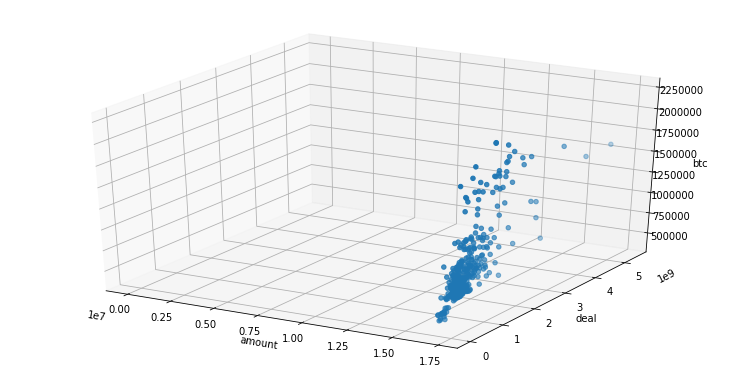

In [303]:
# 3次元のプロットをするためのライブラリを読み込み
from mpl_toolkits.mplot3d import Axes3D

# Axes3Dのインスタンスを生成
ax = Axes3D(plt.figure(figsize=(10, 5)))

# 3次元の散布図を出力
# (x軸, y軸 , z軸)
ax.scatter3D(total['amount'], total['deal'], total['btc'])

# # 回帰平面の方程式を定義
X_grid, Y_grid = np.meshgrid(np.arange(0, 10, 5), np.arange(1, 10, 0.5))
w0 = lr.intercept_
w1 = lr.coef_[0,0]
w2 = lr.coef_[0,1]
Z = w0 + w1*X_grid + w2*Y_grid

# 回帰平面を表示
ax.plot_surface(X_grid, Y_grid, Z, alpha=1, color='red')

# 座標軸のラベルを指定
ax.set_xlabel('amount')
ax.set_ylabel('deal')
ax.set_zlabel('btc')

# ここまでの内容でグラフをプロット
plt.show()

In [25]:
l = [0, 1, 2, 3, 4]
l[::-1]

[4, 3, 2, 1, 0]

In [39]:
A=np.array([9, 7, 7])
A[::-1]

array([7, 7, 9])

In [31]:
type(A)

list

In [32]:
import numpy as np

In [40]:
def test(A):
    B=A[::-1]
    return B

In [41]:
test(A)

array([7, 7, 9])

In [42]:
c=np.array([5, 7, 4, 9, 3, 9])
np.sort(c)

array([3, 4, 5, 7, 9, 9])

In [43]:
A=np.array([5, 7, 4, 9, 3, 9])
def test(A):
    B=np.sort(A)
    return B

In [48]:
A=np.array([[19,  4, 18, 14, 14],
       [13,  6,  9,  7,  5],
       [ 0, 16,  3,  7,  0],
       [19, 11,  8,  9,  2],
       [ 8, 14, 10,  9,  3]])

In [53]:
A.ravel('F') 

array([19, 13,  0, 19,  8,  4,  6, 16, 11, 14, 18,  9,  3,  8, 10, 14,  7,
        7,  9,  9, 14,  5,  0,  2,  3])

In [54]:
def test(A):
    return  A.ravel('F')

In [55]:
test(A)

array([19, 13,  0, 19,  8,  4,  6, 16, 11, 14, 18,  9,  3,  8, 10, 14,  7,
        7,  9,  9, 14,  5,  0,  2,  3])

In [121]:
A=np.array([[9, 1, 6, 3],
       [9, 5, 8, 7],
       [4, 5, 4, 2]])

In [122]:
def test(A):
    B=A>5
    return B

In [123]:
test(A)

array([[ True, False,  True, False],
       [ True, False,  True,  True],
       [False, False, False, False]])

In [63]:
A=np.array([[4, 3, 5, 0, 5],
       [4, 1, 2, 3, 8],
       [5, 2, 7, 8, 8]])
B=np.array([[5, 6, 8, 6, 5],
       [5, 4, 7, 8, 8],
       [8, 1, 3, 5, 8]])

In [64]:
np.r_[A,B]

array([[4, 3, 5, 0, 5],
       [4, 1, 2, 3, 8],
       [5, 2, 7, 8, 8],
       [5, 6, 8, 6, 5],
       [5, 4, 7, 8, 8],
       [8, 1, 3, 5, 8]])

In [65]:
def test(A, B):
    C=np.r_[A,B]
    return C

In [66]:
test(A, B)

array([[4, 3, 5, 0, 5],
       [4, 1, 2, 3, 8],
       [5, 2, 7, 8, 8],
       [5, 6, 8, 6, 5],
       [5, 4, 7, 8, 8],
       [8, 1, 3, 5, 8]])

In [76]:
A=np.array([3, 5, 8, 6, 5, 7, 3, 5, 8])

In [77]:
def test(A):
    B=A.reshape(3,3)**2
    return B

In [78]:
test(A)

array([[ 9, 25, 64],
       [36, 25, 49],
       [ 9, 25, 64]])

In [124]:
A=np.array([[3, 1, 2],
       [1, 1, 3],
       [3, 1, 1]])
B=np.array([[3, 1, 1],
       [1, 1, 3],
       [1, 1, 1]])

In [125]:
def test(A, B):
    C=A.dot(B)
    return C

In [126]:
test(A, B)

array([[12,  6,  8],
       [ 7,  5,  7],
       [11,  5,  7]])

In [127]:
A=np.array([2, 2, 1, 4, 2, 7, 6, 4, 2, 2, 5, 2, 8, 0, 1])
def test(A):
    B=A.reshape(3,5)**2
    return B
test(A)

array([[ 4,  4,  1, 16,  4],
       [49, 36, 16,  4,  4],
       [25,  4, 64,  0,  1]])

In [93]:
A=np.array([[2, 4, 9],
       [4, 7, 9],
       [4, 5, 6],
       [7, 8, 1]])
def test(A):
    B=A+1
    return B
test(A)

array([[ 3,  5, 10],
       [ 5,  8, 10],
       [ 5,  6,  7],
       [ 8,  9,  2]])

In [128]:
A=np.array([5, 0, 7, 2, 3, 3, 7, 8, 5, 7, 5, 6])
B=np.array([6, 0, 1, 8, 4, 0, 6, 6, 0, 7, 3, 7])
def test(A, B):
    C=A+B
    C=C.reshape(4,3)
    return C
test(A, B)

array([[11,  0,  8],
       [10,  7,  3],
       [13, 14,  5],
       [14,  8, 13]])

In [96]:
A=np.array([[8, 8, 4, 0, 2, 8],
       [3, 6, 6, 3, 7, 5],
       [4, 8, 2, 6, 7, 7],
       [3, 8, 1, 1, 7, 2],
       [7, 4, 5, 3, 6, 4],
       [3, 0, 3, 3, 4, 2]])

In [102]:
B=np.diag(np.diag(A))

In [103]:
B

array([[8, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 0, 2]])

In [105]:
def test(A):
    B=np.diag(np.diag(A))
    return B
test(A)

array([[8, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 6, 0],
       [0, 0, 0, 0, 0, 2]])

In [108]:
A=np.array([[3, 7, 8],
       [9, 3, 4],
       [9, 2, 3],
       [7, 2, 1],
       [8, 3, 3]])
def test(A):
    B=A-3
    return B
test(A)

array([[ 0,  4,  5],
       [ 6,  0,  1],
       [ 6, -1,  0],
       [ 4, -1, -2],
       [ 5,  0,  0]])

In [109]:
A=np.array([[9, 4, 4, 1],
       [7, 3, 6, 4],
       [4, 6, 4, 4],
       [3, 4, 1, 7]])
def test(A):
    B=A-3
    return B
test(A)

array([[ 6,  1,  1, -2],
       [ 4,  0,  3,  1],
       [ 1,  3,  1,  1],
       [ 0,  1, -2,  4]])

In [111]:
A=np.array([[7, 4, 2, 1, 6, 6, 1, 8],
       [8, 6, 2, 2, 4, 6, 2, 7],
       [4, 4, 7, 3, 8, 4, 8, 6],
       [8, 6, 4, 6, 4, 4, 8, 6],
       [1, 6, 1, 0, 5, 8, 8, 2],
       [1, 5, 0, 4, 2, 8, 1, 6],
       [5, 4, 1, 8, 4, 6, 7, 5],
       [2, 0, 1, 6, 0, 0, 0, 5]])

In [118]:
A[::-1]

array([[2, 0, 1, 6, 0, 0, 0, 5],
       [5, 4, 1, 8, 4, 6, 7, 5],
       [1, 5, 0, 4, 2, 8, 1, 6],
       [1, 6, 1, 0, 5, 8, 8, 2],
       [8, 6, 4, 6, 4, 4, 8, 6],
       [4, 4, 7, 3, 8, 4, 8, 6],
       [8, 6, 2, 2, 4, 6, 2, 7],
       [7, 4, 2, 1, 6, 6, 1, 8]])

In [119]:
np.diag(A[::-1])

array([2, 4, 0, 0, 4, 4, 2, 8])

In [120]:
np.diag(np.diag(A[::-1]))

array([[2, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 8]])

In [115]:
np.diag(np.diag(A[::-1]))[::-1]

array([[0, 0, 0, 0, 0, 0, 0, 8],
       [0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0]])

In [117]:
def test(A):
    B=np.diag(np.diag(A[::-1]))[::-1]
    return B
test(A)

array([[0, 0, 0, 0, 0, 0, 0, 8],
       [0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
import xgboost